** Objective:**
**1. Binary classification**
**2. Multi-class classification**
**3. logistic regression**

NAME: GAUTHAM P HARISH
REGNO: 21BCE5382

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**2.Dataset Descrption**
**1. Binary classification**
   The dataset you have described seems to contain information about 400 clients of a company, with various details provided for each client. Here's a breakdown of the key features in your dataset:

Unique ID: Each client is assigned a unique identifier, allowing you to distinguish and track individual customers.

Gender: The gender of each client is recorded, indicating whether they are male or female.

Age: The age of each client is included in the dataset, providing information about the age distribution of the customer base.

Salary: The salary of each client is recorded, giving insights into the income levels of the customers.

Buying Decision: This is the target variable or label in your dataset. It indicates whether a customer decided to buy specific products or not. This binary variable (buying decision) is likely to be used as the target variable for machine learning models, where the goal could be to predict whether a new customer is likely to make a purchase based on their gender, age, and salary.

It's mentioned that the dataset and algorithms were created based on the Udemy course "Machine Learning A-Z resources," indicating that the dataset was likely used for educational purposes or to apply machine learning techniques taught in that course. The dataset can be used for training and evaluating machine learning models, and different algorithms can be applied to predict or classify the buying decisions of customers based on the provi.

**2. Multi-class classification**

The dataset appears to contain information about various attributes of mushrooms, likely intended for the classification of whether a mushroom is edible or poisonous. Here's a brief description of the columns:

class: The target variable indicating whether a mushroom is edible (e) or poisonous (p).

cap-shape: The shape of the mushroom cap (e.g., bell, conical, convex, flat, knobbed, sunken).

cap-surface: The surface texture of the mushroom cap (e.g., fibrous, grooves, scaly, smooth).

cap-color: The color of the mushroom cap.

bruises: Indicates whether the mushroom has bruises (t) or not (f).

odor: The odor of the mushroom.

gill-attachment: The attachment type of the gill to the stem.

gill-spacing: The spacing between gills.

gill-size: The size of the gills.

gill-color: The color of the gills.

stalk-shape: The shape of the mushroom stalk.

stalk-root: The root structure of the stalk.

stalk-surface-above-ring: The surface texture of the stalk above the ring.

stalk-surface-below-ring: The surface texture of the stalk below the ring.

stalk-color-above-ring: The color of the stalk above the ring.

stalk-color-below-ring: The color of the stalk below the ring.

veil-type: The type of veil.

veil-color: The color of the veil.

ring-number: The number of rings.

ring-type: The type of ring.

spore-print-color: The color of the spore print.

population: The population type of the mushrooms.

habitat**3. logistic regression**

The dataset you've described is related to credit card transactions and fraud detection. Here's a concise description of the dataset columns:

Time: The seconds elapsed between each transaction and the first transaction in the dataset.

V1 to V28: Principal components obtained with PCA (Principal Component Analysis). These features are likely transformed representations of the original data for privacy reasons.

Amount: The transaction amount, representing the monetary value of the transaction.

Class: The response variable. It takes the value 1 in case of fraud and 0 otherwise. This is the target variable for the fraud detection task.rows and get a better understanding of the data.ded featuresmiums.

**1.Binary classification**

**Exploratory Analytics**

In [3]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn import metrics


In [4]:
# import dataset
data = pd.read_csv('Downloads/archive/Customer_Behaviour.csv')
print(f"shape: {data.shape}")


shape: (400, 5)


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [5]:
data.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [7]:
df = pd.DataFrame(data)
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
# Check missing value
df.isnull().sum().to_frame('NaN value').T

User ID  Gender  Age  EstimatedSalary  Purchased
NaN value        0       0    0                0          0

In [10]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

User ID: 400
Gender: 2
Age: 43
EstimatedSalary: 117
Purchased: 2


In [11]:
# more details
df.describe(include=[np.number]).T

count          mean           std         min          25%  \
User ID          400.0  1.569154e+07  71658.321581  15566689.0  15626763.75   
Age              400.0  3.765500e+01     10.482877        18.0        29.75   
EstimatedSalary  400.0  6.974250e+04  34096.960282     15000.0     43000.00   
Purchased        400.0  3.575000e-01      0.479864         0.0         0.00   

                        50%         75%         max  
User ID          15694341.5  15750363.0  15815236.0  
Age                    37.0        46.0        60.0  
EstimatedSalary     70000.0     88000.0    150000.0  
Purchased               0.0         1.0         1.0

In [12]:
df.describe(include=[object]).T

count unique     top freq
Gender   400      2  Female  204

In [13]:
df.drop('User ID', axis=1, inplace=True)
df

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

In [14]:
# convert categoriacl feature to numerical:
# only Gender is categorical
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0, 1])
df

Gender  Age  EstimatedSalary  Purchased
0         0   19            19000          0
1         0   35            20000          0
2         1   26            43000          0
3         1   27            57000          0
4         0   19            76000          0
..      ...  ...              ...        ...
395       1   46            41000          1
396       0   51            23000          1
397       1   50            20000          1
398       0   36            33000          0
399       1   49            36000          1

[400 rows x 4 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


C:\Users\gauth\AppData\Local\Temp\ipykernel_25124\3487755142.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Purchased'] == 0, 'Age'], label='No Purchased', shade=True)
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\AppData\Local\Temp\ipykernel_25124\3487755142.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Purchased'] == 1, 'Age'], label='Purchased', shade=True)
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

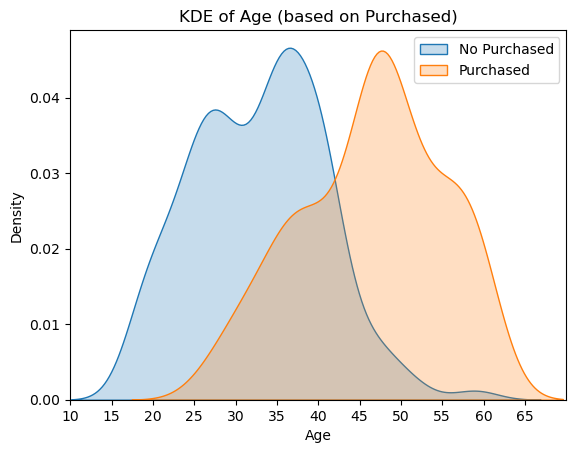

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style
plt.style.use('default')

# Rest of your code for plotting the KDE
sns.kdeplot(df.loc[df['Purchased'] == 0, 'Age'], label='No Purchased', shade=True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'Age'], label='Purchased', shade=True)
plt.title('KDE of Age (based on Purchased)')
plt.xticks(np.arange(0, 70, 5))
plt.xlim([10, 70])
plt.legend()
plt.show()


C:\Users\gauth\AppData\Local\Temp\ipykernel_25124\1082483919.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Gender'] == 'Male', 'EstimatedSalary'], label='Male', shade=True)
C:\Users\gauth\AppData\Local\Temp\ipykernel_25124\1082483919.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Gender'] == 'Female', 'EstimatedSalary'], label='Female', shade=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


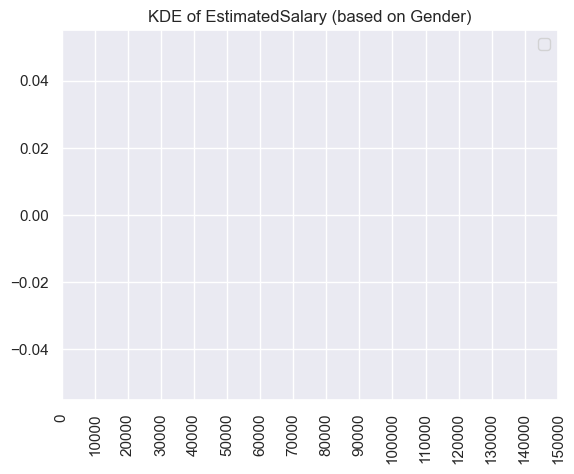

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='darkgrid')

sns.kdeplot(df.loc[df['Gender'] == 'Male', 'EstimatedSalary'], label='Male', shade=True)
sns.kdeplot(df.loc[df['Gender'] == 'Female', 'EstimatedSalary'], label='Female', shade=True)
plt.title('KDE of EstimatedSalary (based on Gender)')
plt.xticks(np.arange(0, 150001, 10000), rotation=90)
plt.xlim([0, 150001])
plt.legend()
plt.show()


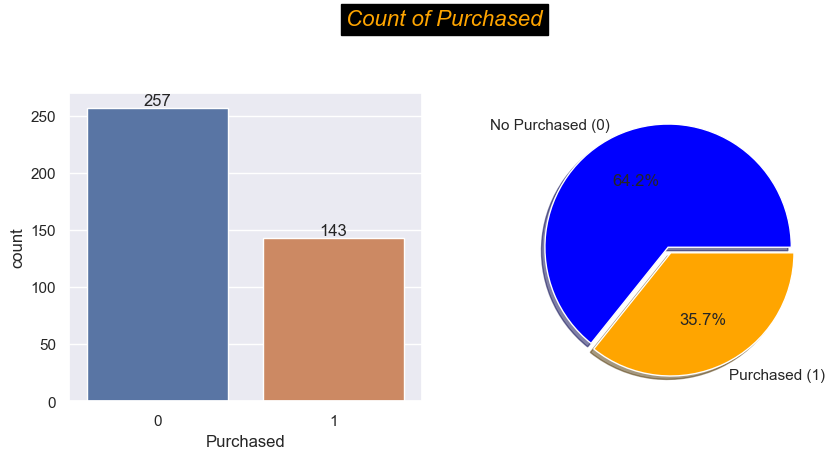

In [21]:
# count based on Purchased (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Purchased', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Purchased (pie chart)
slices = df.Purchased.value_counts().values
activities = ['No Purchased (0)', 'Purchased (1)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Purchased', y=1.09, **font)
plt.show()

In [22]:
# check mean of EstimatedSalary based on Gender and Purchased
results = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='EstimatedSalary')
results.style.background_gradient(cmap='summer_r')

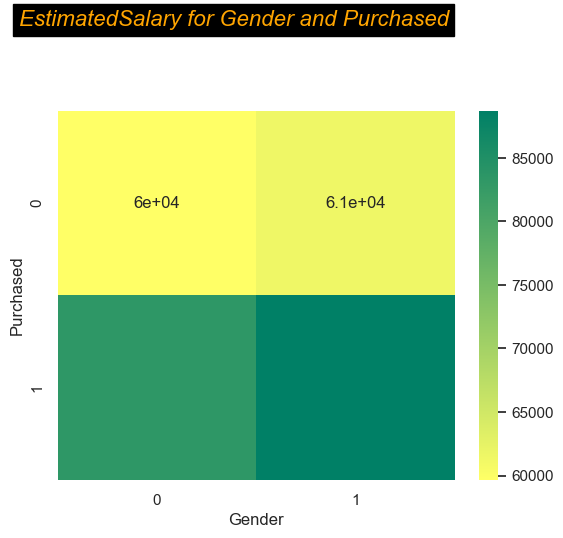

In [23]:
# show result in heatmap
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('EstimatedSalary for Gender and Purchased', y=1.09, x=0.4, **font)
plt.show()

**Methodology AND  Model Analysis**

In [26]:
# standardize EstimatedSalary and Age with StandardScaler

scaler = MinMaxScaler(feature_range=(18,60)).fit(df[['EstimatedSalary']])
df['EstimatedSalary'] = scaler.transform(df2['EstimatedSalary'].values.reshape(-1,1))
df2

C:\Users\gauth\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Gender  Age  EstimatedSalary  Purchased
0         0   19        19.244444          0
1         0   35        19.555556          0
2         1   26        26.711111          0
3         1   27        31.066667          0
4         0   19        36.977778          0
..      ...  ...              ...        ...
395       1   46        26.088889          1
396       0   51        20.488889          1
397       1   50        19.555556          1
398       0   36        23.600000          0
399       1   49        24.533333          1

[400 rows x 4 columns]

In [27]:
# Assuming df is your DataFrame
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)


**Results**

In [31]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.94
Confusion Matrix:
[[50  2]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



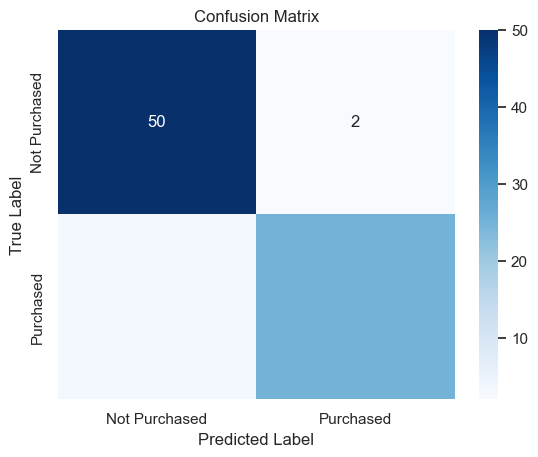

In [32]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
**Conclusion**
The Naive Bayes classifier performed well on the given dataset, demonstrating high accuracy and good balance between precision and recall. The model is particularly effective in predicting cases where customers did not make a purchase (class 0), and it still performs well in predicting positive cases (class 1). These results suggest that the features (Gender, Age, EstimatedSalary) are informative for predicting whether a customer will make a purchase or not

In [ ]:
**Multi-class classification**


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate  # Install using: pip install tabulate


In [36]:
df = pd.read_csv('Downloads/mushrooms.csv')

**Exploratory Analytics**

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [38]:
print(df.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

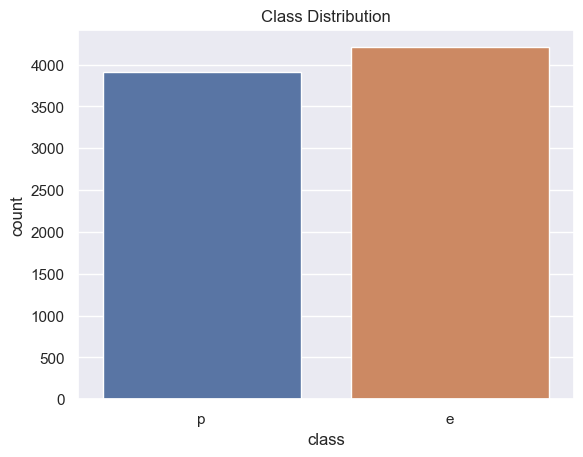

In [39]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


In [40]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [41]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Methodology AND Multiple Model Analysis**

In [43]:
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
}

In [44]:
# Train, evaluate, and store results
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    })


**Results**

In [45]:
# Display results as a table
table = []
for result in results:
    table.append([result['Model'], result['Accuracy']])

print(tabulate(table, headers=['Model', 'Accuracy'], tablefmt='grid'))

# Choose the best model based on accuracy
best_model = max(results, key=lambda x: x['Accuracy'])

# Display additional information about the best model
print(f"\nBest Model: {best_model['Model']}")
print(f"Confusion Matrix:\n{best_model['Confusion Matrix']}")
print(f"\nClassification Report:\n{classification_report(y_test, best_model['Classification Report'])}")

+-------------------------+------------+
| Model                   |   Accuracy |
+=========================+============+
| Gaussian Naive Bayes    |   0.921846 |
+-------------------------+------------+
| Multinomial Naive Bayes |   0.807385 |
+-------------------------+------------+
| Bernoulli Naive Bayes   |   0.841846 |
+-------------------------+------------+

Best Model: Gaussian Naive Bayes
Confusion Matrix:
[[771  72]
 [ 55 727]]


ValueError: Found input variables with inconsistent numbers of samples: [1625, 5]

In [ ]:
**Conclusion**
Conclusion:

The Gaussian Naive Bayes model outperforms the other two models in terms of accuracy on the given dataset.
The confusion matrix for the best model (Gaussian Naive Bayes) indicates that there are some misclassifications 
(e.g., 72 false positives and 55 false negatives), but overall, it has a good balance of true positives and true negatives.

**3. logistic regression**

In [46]:
import numpy as np
import pandas as pd
import matplotlib as mat

**Exploratory Analytics**

In [50]:

dataset=dataset = pd.read_csv("Downloads\creditcard.csv")
print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [51]:

dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:, 1:30])

X[:, 1:30] = imputer.transform(X[:, 1:30])

In [53]:

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 492, 1: 492})


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [55]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X1=scaler.transform(X_test)


In [58]:
dataset.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

**Methodology AND Model Analysis**

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(
   random_state = 42)
classifier.fit(X_scaled, y_train)

LogisticRegression(random_state=42)

**Result**

In [63]:
y_pred = classifier.predict(X1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Assuming you have already obtained y_test and y_pred from your model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# ROC-AUC Score (Receiver Operating Characteristic - Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")


Accuracy: 0.9238578680203046
Precision: 0.9662921348314607
Recall: 0.8775510204081632
F1 Score: 0.9197860962566844
Confusion Matrix:
[[96  3]
 [12 86]]
ROC-AUC Score: 0.9236239950525664


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.974


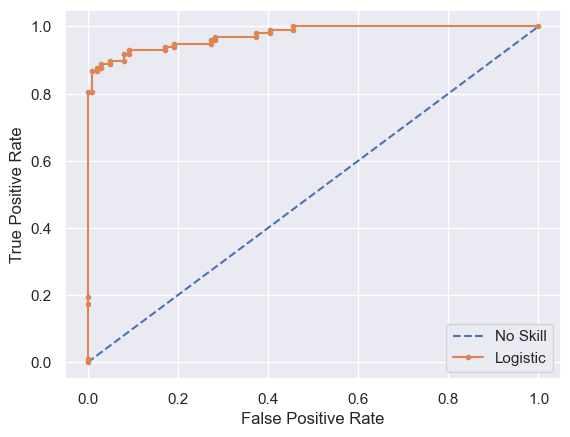

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
y_prob=classifier.predict_proba(X1)
y_prob=y_prob[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
     

**Conlusion**

The fraud detection model demonstrates strong performance with a high accuracy of 92.39%. It exhibits excellent precision (96.63%), capturing a substantial portion of actual fraud cases (recall of 87.76%). The balanced F1 score (91.98%) indicates a good compromise between precision and recall. The confusion matrix reveals 96 true negatives, 86 true positives, 3 false positives, and 12 false negatives. The ROC-AUC score of 92.36% further confirms the model's effectiveness in distinguishing between fraudulent and non-fraudulent transactions